In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
patient = pd.read_csv("Final_Q.csv")

In [3]:
patient

,Sr.no,AvgRed,AvgGreen,AvgBlue,Vata,Pitta,Kapha,cateogary
0,21,57.00000,35.61000,40.32000,0.000000,4.460000,3.780000,healthy
1,22,72.98000,38.78000,42.64000,8.160000,3.570000,3.780000,healthy
2,23,78.94000,37.13000,39.01000,0.000000,0.890000,9.090000,healthy
3,24,107.30000,40.33000,44.34000,0.510000,0.000000,3.780000,healthy
4,25,89.76000,35.38000,39.63000,4.080000,0.000000,2.270000,healthy
...,...,...,...,...,...,...,...,...
297,U_105,57.61333,18.90933,24.25467,28.061224,15.178571,16.666667,unhealthy
298,U_149,50.88000,16.68933,20.04800,2.040816,0.000000,21.212121,unhealthy
299,U_54,44.30077,28.85154,31.32385,9.183673,10.714286,13.636364,unhealthy
300,U_55,47.12105,19.09474,22.41474,4.081633,7.142857,18.181818,unhealthy


In [4]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sr.no      302 non-null    object 
 1   AvgRed     302 non-null    float64
 2   AvgGreen   302 non-null    float64
 3   AvgBlue    302 non-null    float64
 4   Vata       302 non-null    float64
 5   Pitta      302 non-null    float64
 6   Kapha      302 non-null    float64
 7   cateogary  302 non-null    object 
dtypes: float64(6), object(2)
memory usage: 19.0+ KB


In [5]:
patient.describe()

,AvgRed,AvgGreen,AvgBlue,Vata,Pitta,Kapha
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,63.703460,25.145839,29.836075,9.179171,6.689402,10.788280
std,15.131544,8.330830,8.902618,8.778494,7.524267,8.744084
min,25.936250,6.018750,9.945000,0.000000,0.000000,0.000000
25%,52.885312,19.279853,23.117500,3.571429,1.785714,3.787879
50%,61.368335,24.500000,29.307335,5.612245,3.571429,9.090909
75%,74.053998,31.164997,35.859000,12.755102,8.928571,15.151515
max,117.640000,50.941430,57.160000,51.100000,42.857143,50.000000


In [6]:
patient['cateogary'].value_counts()

cateogary
unhealthy    152
healthy      150
Name: count, dtype: int64

In [8]:
patient.isnull().sum()

Sr.no        0
AvgRed       0
AvgGreen     0
AvgBlue      0
Vata         0
Pitta        0
Kapha        0
cateogary    0
dtype: int64

# LabelEncoding

In [9]:
patient['cateogary'].replace('unhealthy',0,inplace=True)

patient['cateogary'].replace('healthy',1,inplace=True)

patient.head()

,Sr.no,AvgRed,AvgGreen,AvgBlue,Vata,Pitta,Kapha,cateogary
0,21,57.00,35.61,40.32,0.00,4.46,3.78,1
1,22,72.98,38.78,42.64,8.16,3.57,3.78,1
2,23,78.94,37.13,39.01,0.00,0.89,9.09,1
3,24,107.30,40.33,44.34,0.51,0.00,3.78,1
4,25,89.76,35.38,39.63,4.08,0.00,2.27,1


# Feature Selection 

In [19]:
X = patient.iloc[:,1:4]
Y = patient.iloc[:,7]

In [20]:
X

,AvgRed,AvgGreen,AvgBlue
0,57.00000,35.61000,40.32000
1,72.98000,38.78000,42.64000
2,78.94000,37.13000,39.01000
3,107.30000,40.33000,44.34000
4,89.76000,35.38000,39.63000
...,...,...,...
297,57.61333,18.90933,24.25467
298,50.88000,16.68933,20.04800
299,44.30077,28.85154,31.32385
300,47.12105,19.09474,22.41474


In [21]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: cateogary, Length: 302, dtype: int64

In [22]:
X.corr()

,AvgRed,AvgGreen,AvgBlue
AvgRed,1.000000,0.639023,0.624165
AvgGreen,0.639023,1.000000,0.970451
AvgBlue,0.624165,0.970451,1.000000


In [23]:
import statsmodels.api as sm

In [24]:
model = sm.Logit(Y, X)

In [25]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.677452
         Iterations 4


In [26]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              cateogary   No. Observations:                  302
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                 0.02261
Time:                        17:44:17   Log-Likelihood:                -204.59
converged:                       True   LL-Null:                       -209.32
Covariance Type:            nonrobust   LLR p-value:                  0.008797
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AvgRed        -0.0233      0.008     -2.848      0.004      -0.039      -0.007
AvgGreen       0.0059      0.056      0.105      0.916      -0.105       0.116
AvgBlue        0.0465      0.051      0.905      0.3

In [39]:
import seaborn as sns

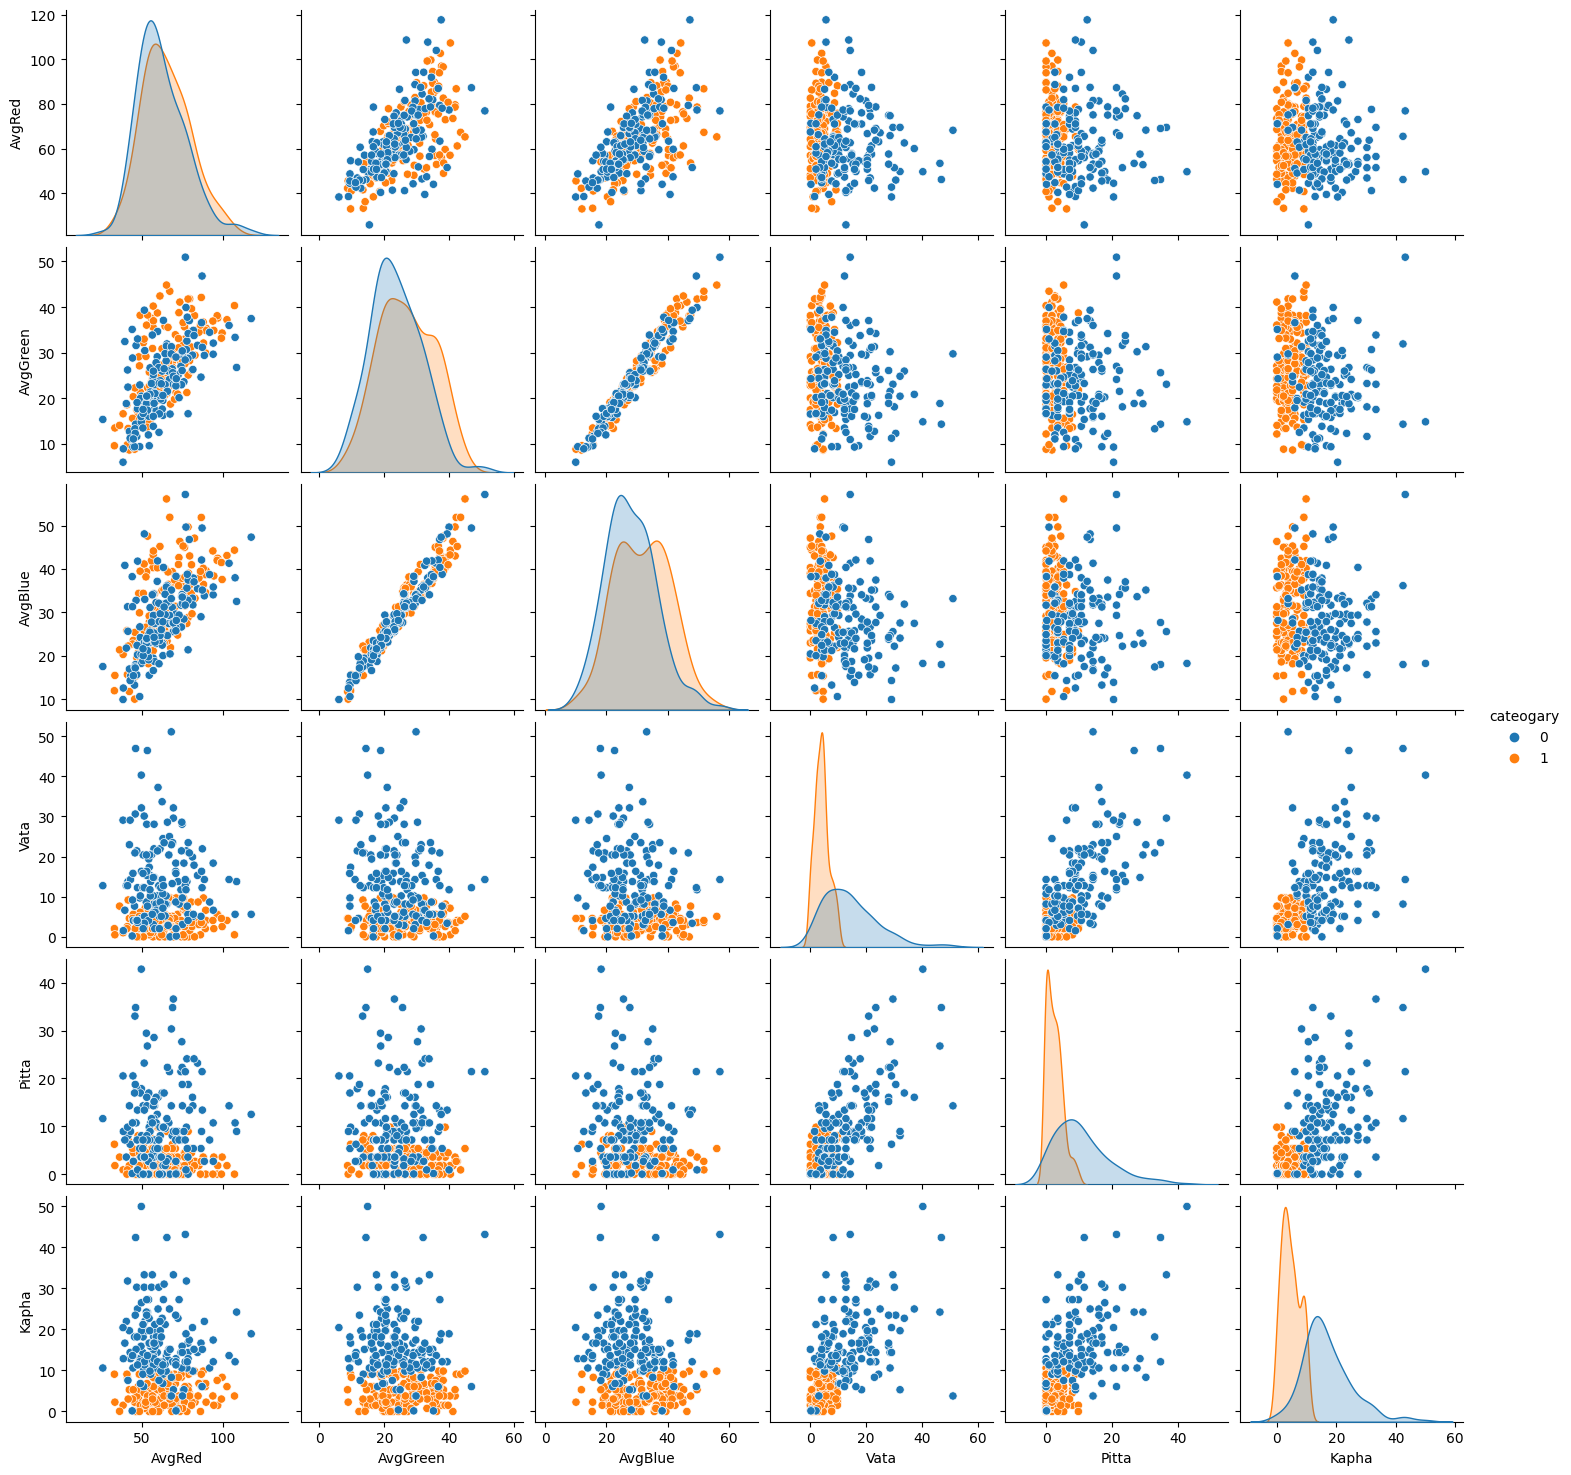

In [40]:
sns.pairplot(patient,hue='cateogary')

In [27]:
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [50]:
# Get the counts
count_X_train = X_train.shape[0]  
count_X_test = X_test.shape[0]  
count_y_train = len(y_train)
count_y_test = len(y_test)

# Print the counts
print("Count in X_train:", count_X_train)
print("Count in X_test:", count_X_test)
print("Count in y_train:", count_y_train)
print("Count in y_test:", count_y_test)

Count in X_train: 211
Count in X_test: 91
Count in y_train: 211
Count in y_test: 91


In [29]:
from sklearn.svm import SVC

In [30]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(criterion = 'entropy',max_depth=4)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
num_trees=2

KNN: 0.568615 (0.075491)
CART: 0.562771 (0.159022)
NB: 0.582035 (0.135839)
SVM: 0.581818 (0.150113)


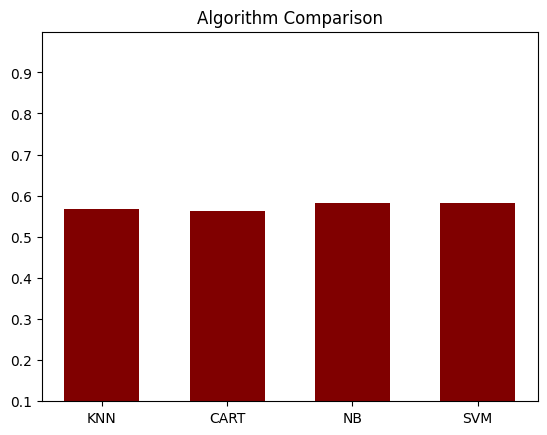

In [31]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

plt.ylim(.100, .999)
plt.bar(names, res, color ='maroon', width = 0.6)

plt.title('Algorithm Comparison')
plt.show()

In [32]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22 25]
 [22 22]]


0.4835164835164835

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[74 31]
 [27 79]]


0.7251184834123223

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y =Y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 51.94 %


# With Questionnaire

In [42]:
X = patient.iloc[:,1:7]
Y = patient.iloc[:,7]

In [43]:
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [44]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(criterion = 'entropy',max_depth=4)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
num_trees=2

KNN: 0.880952 (0.064769)
CART: 0.971429 (0.038095)
NB: 0.928571 (0.057341)
SVM: 0.933333 (0.043644)


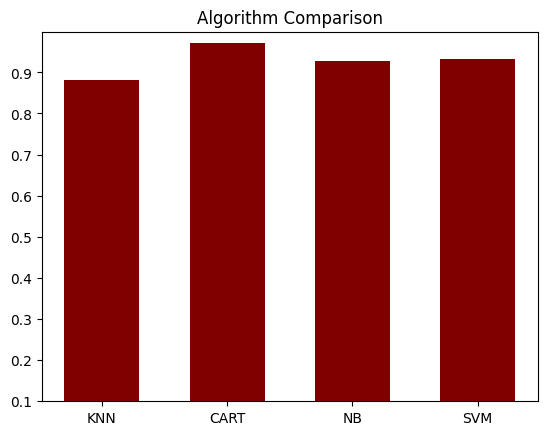

In [45]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

plt.ylim(.100, .999)
plt.bar(names, res, color ='maroon', width = 0.6)

plt.title('Algorithm Comparison')
plt.show()

In [46]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[40  7]
 [ 0 44]]


0.9230769230769231

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[ 85  20]
 [  0 106]]


0.9052132701421801

In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y =Y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 91.02 %


# With Kalman

In [51]:
patient = pd.read_csv("Book2.csv")

In [52]:
patient

,Avg Red,Avg Green,Avg Blue,class
0,57.002857,35.608571,40.324000,1
1,57.944389,35.911729,40.533840,1
2,59.112593,36.018165,40.407498,1
3,61.652789,36.364060,40.708707,1
4,63.060292,36.290907,40.631783,1
...,...,...,...,...
297,63.106020,23.649273,28.063280,0
298,63.031135,23.604464,28.011851,0
299,62.917098,23.638036,28.032971,0
300,62.821497,23.609146,27.997366,0


In [53]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Avg Red    302 non-null    float64
 1   Avg Green  302 non-null    float64
 2   Avg Blue   302 non-null    float64
 3   class      302 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.6 KB


In [54]:
patient.describe()

,Avg Red,Avg Green,Avg Blue,class
count,302.000000,302.000000,302.000000,302.000000
mean,65.029083,26.362145,30.568372,0.496689
std,1.747384,3.646338,3.650351,0.500819
min,57.002857,22.224984,26.516952,0.000000
25%,63.848568,23.256252,27.550866,0.000000
50%,64.607366,26.076757,29.726828,0.000000
75%,66.644811,27.674805,32.242438,1.000000
max,69.088427,36.684855,41.122448,1.000000


In [55]:
X = patient.iloc[:,:3]
Y = patient.iloc[:,3]

In [56]:
X

,Avg Red,Avg Green,Avg Blue
0,57.002857,35.608571,40.324000
1,57.944389,35.911729,40.533840
2,59.112593,36.018165,40.407498
3,61.652789,36.364060,40.708707
4,63.060292,36.290907,40.631783
...,...,...,...
297,63.106020,23.649273,28.063280
298,63.031135,23.604464,28.011851
299,62.917098,23.638036,28.032971
300,62.821497,23.609146,27.997366


In [57]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: class, Length: 302, dtype: int64

In [60]:
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [61]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(criterion = 'entropy',max_depth=4)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
num_trees=2

KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.976623 (0.030988)
SVM: 1.000000 (0.000000)


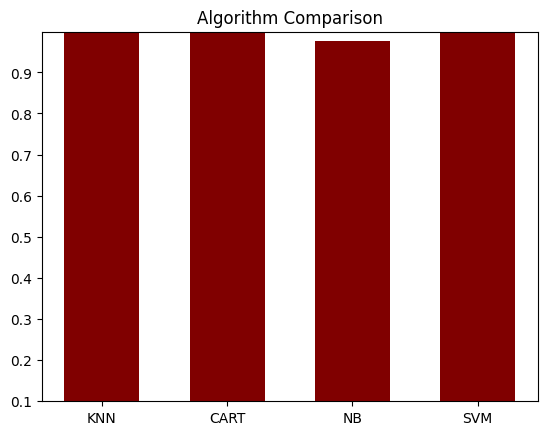

In [62]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

plt.ylim(.100, .999)
plt.bar(names, res, color ='maroon', width = 0.6)

plt.title('Algorithm Comparison')
plt.show()